<a href="https://colab.research.google.com/github/arleswasb/projeto_SD_02/blob/main/graficos_Pj_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gráfico salvo com sucesso em 'desempenho_grafico.png'


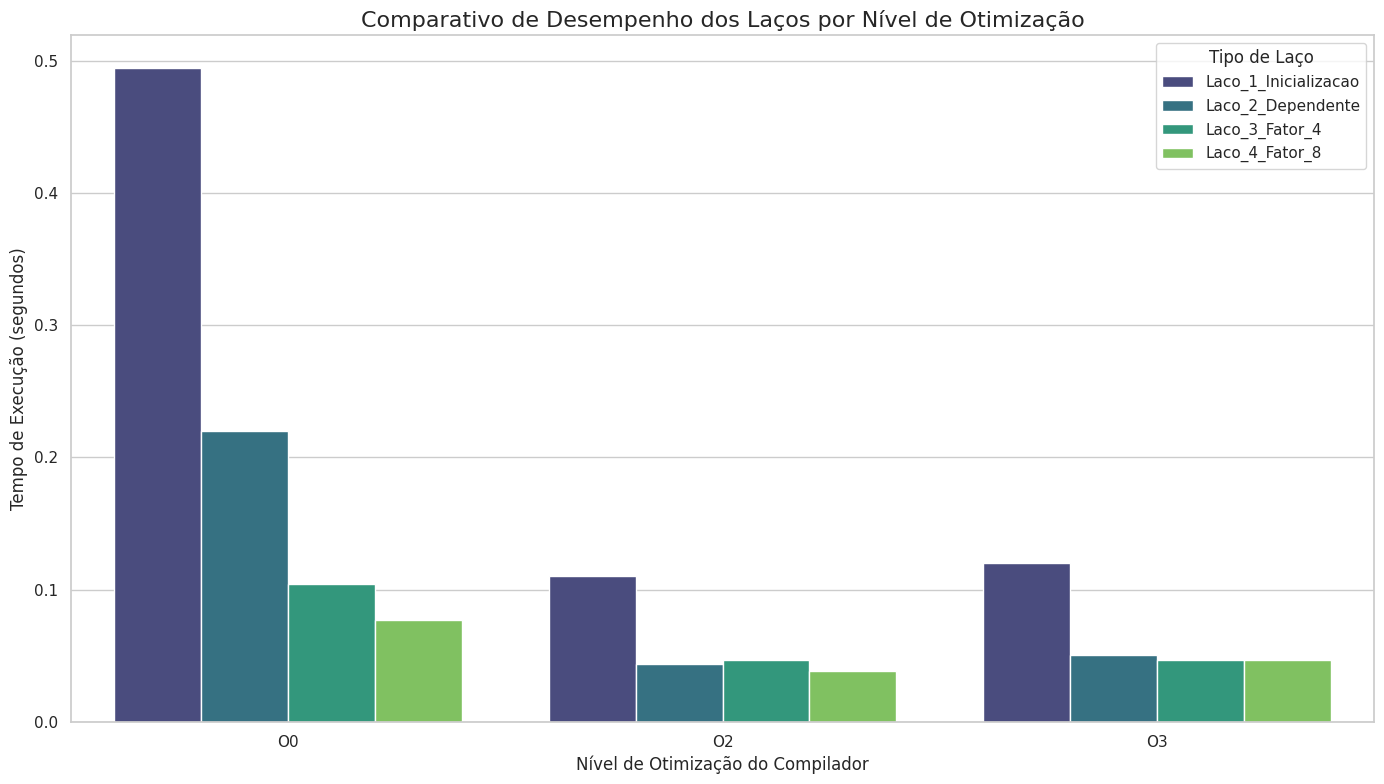

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def gerar_grafico_desempenho(caminho_csv: str, arquivo_saida: str):
    """
    Lê um arquivo CSV com dados de desempenho, trata os dados e gera
    um gráfico de barras comparativo.

    Args:
        caminho_csv: O caminho para o arquivo CSV de entrada.
        arquivo_saida: O nome do arquivo de imagem para salvar o gráfico.
    """
    try:
        # Tenta ler o arquivo com codificação 'latin-1', que é robusta a
        # erros de codificação comuns em ambientes Windows.
        # O separador decimal é tratado como vírgula.
        df = pd.read_csv(caminho_csv, encoding='latin-1',sep=';',decimal=',')

        # Renomeia as colunas para facilitar o acesso (remove espaços ou caracteres especiais)
        df.columns = ['Otimizacao', 'Laco', 'Tempo_s']

        # Converte a coluna de tempo para o tipo numérico (float)
        # O parâmetro 'decimal' no read_csv já deve ter cuidado disso,
        # mas garantimos a conversão aqui.
        df['Tempo_s'] = pd.to_numeric(df['Tempo_s'])

        # Define o estilo do gráfico
        sns.set_theme(style="whitegrid")
        plt.figure(figsize=(14, 8))

        # Cria o gráfico de barras
        ax = sns.barplot(
            data=df,
            x='Otimizacao',
            y='Tempo_s',
            hue='Laco',
            palette='viridis' # Escolhe uma paleta de cores
        )

        # Adiciona títulos e rótulos para clareza
        plt.title('Comparativo de Desempenho dos Laços por Nível de Otimização', fontsize=16)
        plt.xlabel('Nível de Otimização do Compilador', fontsize=12)
        plt.ylabel('Tempo de Execução (segundos)', fontsize=12)
        plt.legend(title='Tipo de Laço')

        # Melhora a legibilidade dos eixos
        plt.xticks(rotation=0)
        plt.tight_layout() # Ajusta o layout para evitar sobreposição

        # Salva o gráfico em um arquivo de imagem
        plt.savefig(arquivo_saida)

        print(f"Gráfico salvo com sucesso em '{arquivo_saida}'")

    except FileNotFoundError:
        print(f"Erro: O arquivo '{caminho_csv}' não foi encontrado.")
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

# --- Execução do Script ---
# Certifique-se de que o arquivo 'dados_desempenho.csv' está na mesma pasta
# ou forneça o caminho completo.
gerar_grafico_desempenho('dados_desempenho.csv', 'desempenho_grafico.png')